## __Importing Libraries__

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For upsampling
from sklearn.utils import resample

# For encoding
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

## __Importing Dataset__

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF                        Type  
0       0       0           0            0    0  Typical aura with migraine  
1       0       0           0            0    0  Typical aura with migraine  
2       0       0           0            0    0  Typical aura with migraine  
3       0       0           0            0    0  Typical aura with migraine  
4       0       0           0            0    1  Typical aura with migraine  

[5 rows x 24 columns]

## ___Exploratory Data Analysis___

## __Relation between Categorical Variable and Target Variable__

In [4]:
cat_col = []
con_col = []

for col in df.columns:
    if df[col].nunique() < 15:
        cat_col.append(col)
    else:
        con_col.append(col)

In [5]:
def count_percentage_plot(df, x, target, suptitle):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    plt.suptitle(suptitle, fontsize=16)
    
    # Plot the count plot
    ax1.set_title(f"Number of {x.capitalize()} across Migraine Type")
    sns.countplot(data=df,x=target, hue=x, ax=ax1, palette="Set1")
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    # Plot the percent plot
    ax2.set_title(f"Percentage of {x.capitalize()} across Migraine Type")
    sns.histplot(df, x=target, hue=x, stat="probability", multiple="fill", shrink=1,ax=ax2, palette='Set1')
    ax2.set_xlabel("")
    ax2.set_ylabel("Percentage")
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    
    # Annotating the plots
    for p1,p2 in zip(ax1.patches,ax2.patches):
        ax1.annotate("{:.1f}".format(p1.get_height()), (p1.get_x(),p1.get_height()))
        ax2.annotate("{:.2f}".format(p2.get_height()), (p2.get_x(),p2.get_height()))
        
    plt.tight_layout(pad=2)
    plt.show()

## __Duration and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


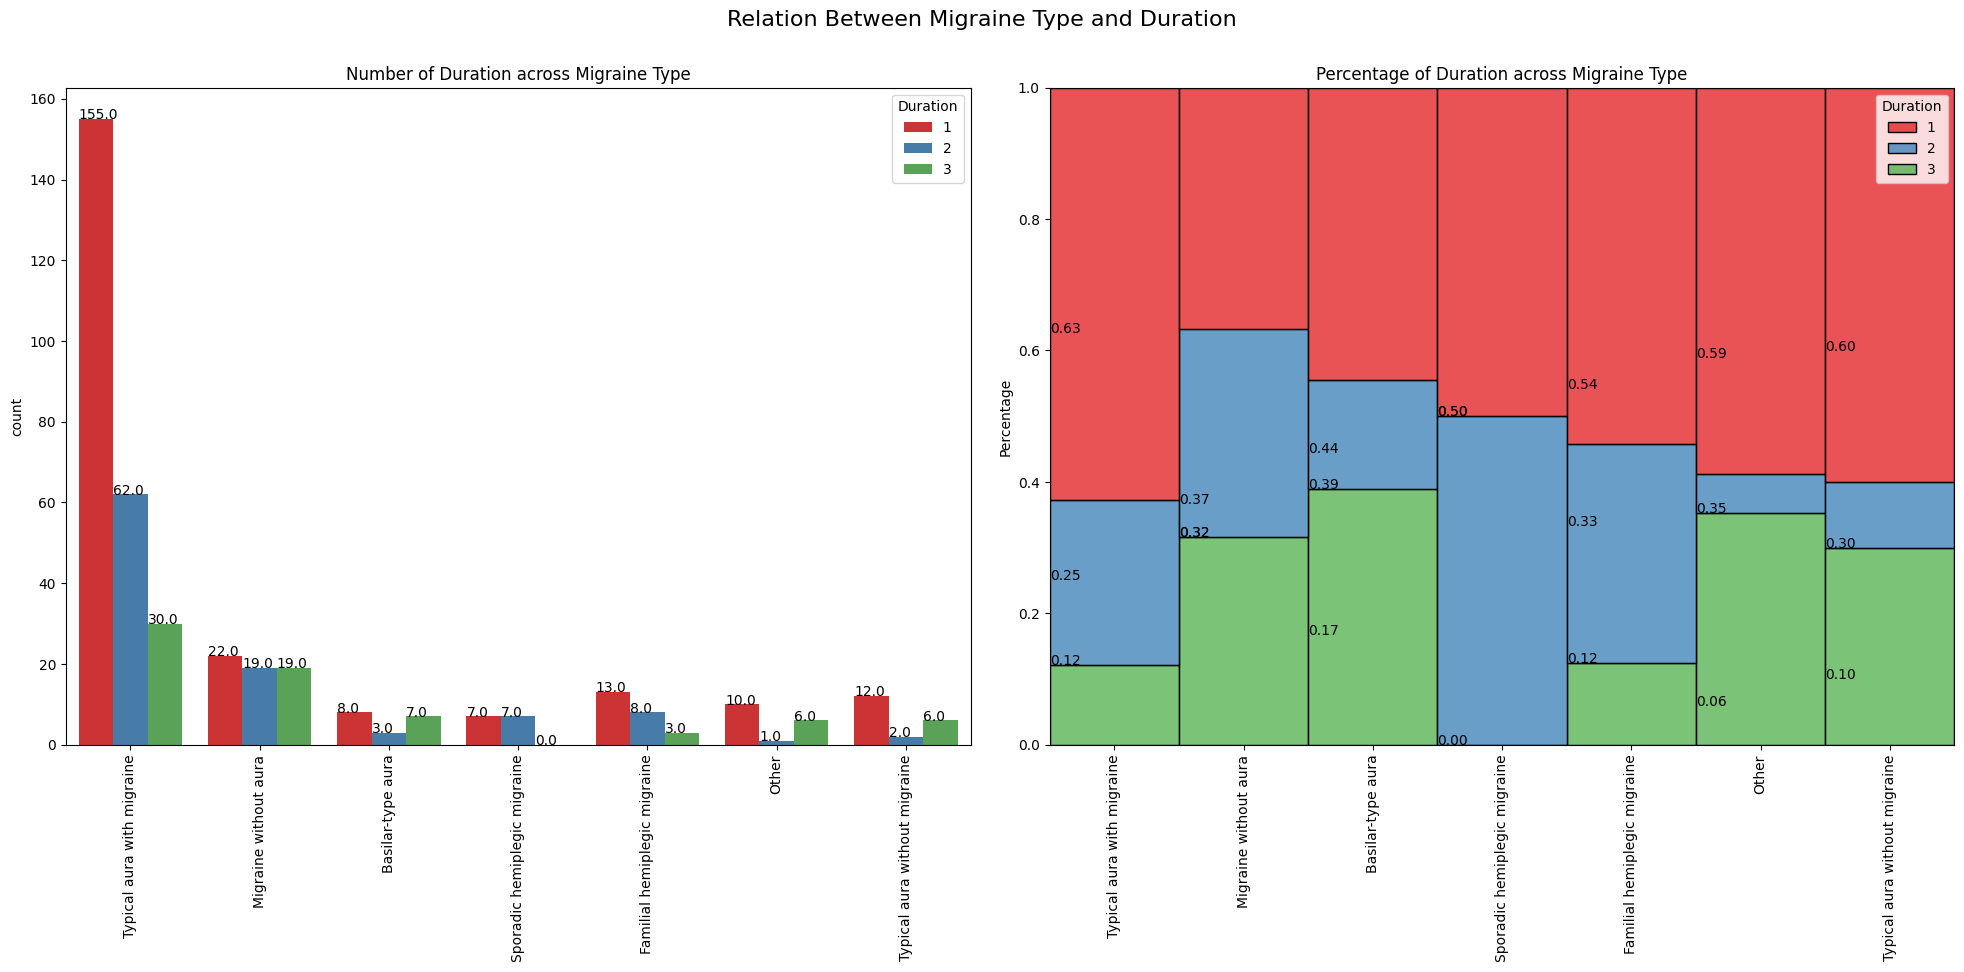

In [6]:
count_percentage_plot(df, 'Duration', 'Type', "Relation Between Migraine Type and Duration")

## __Frequency and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


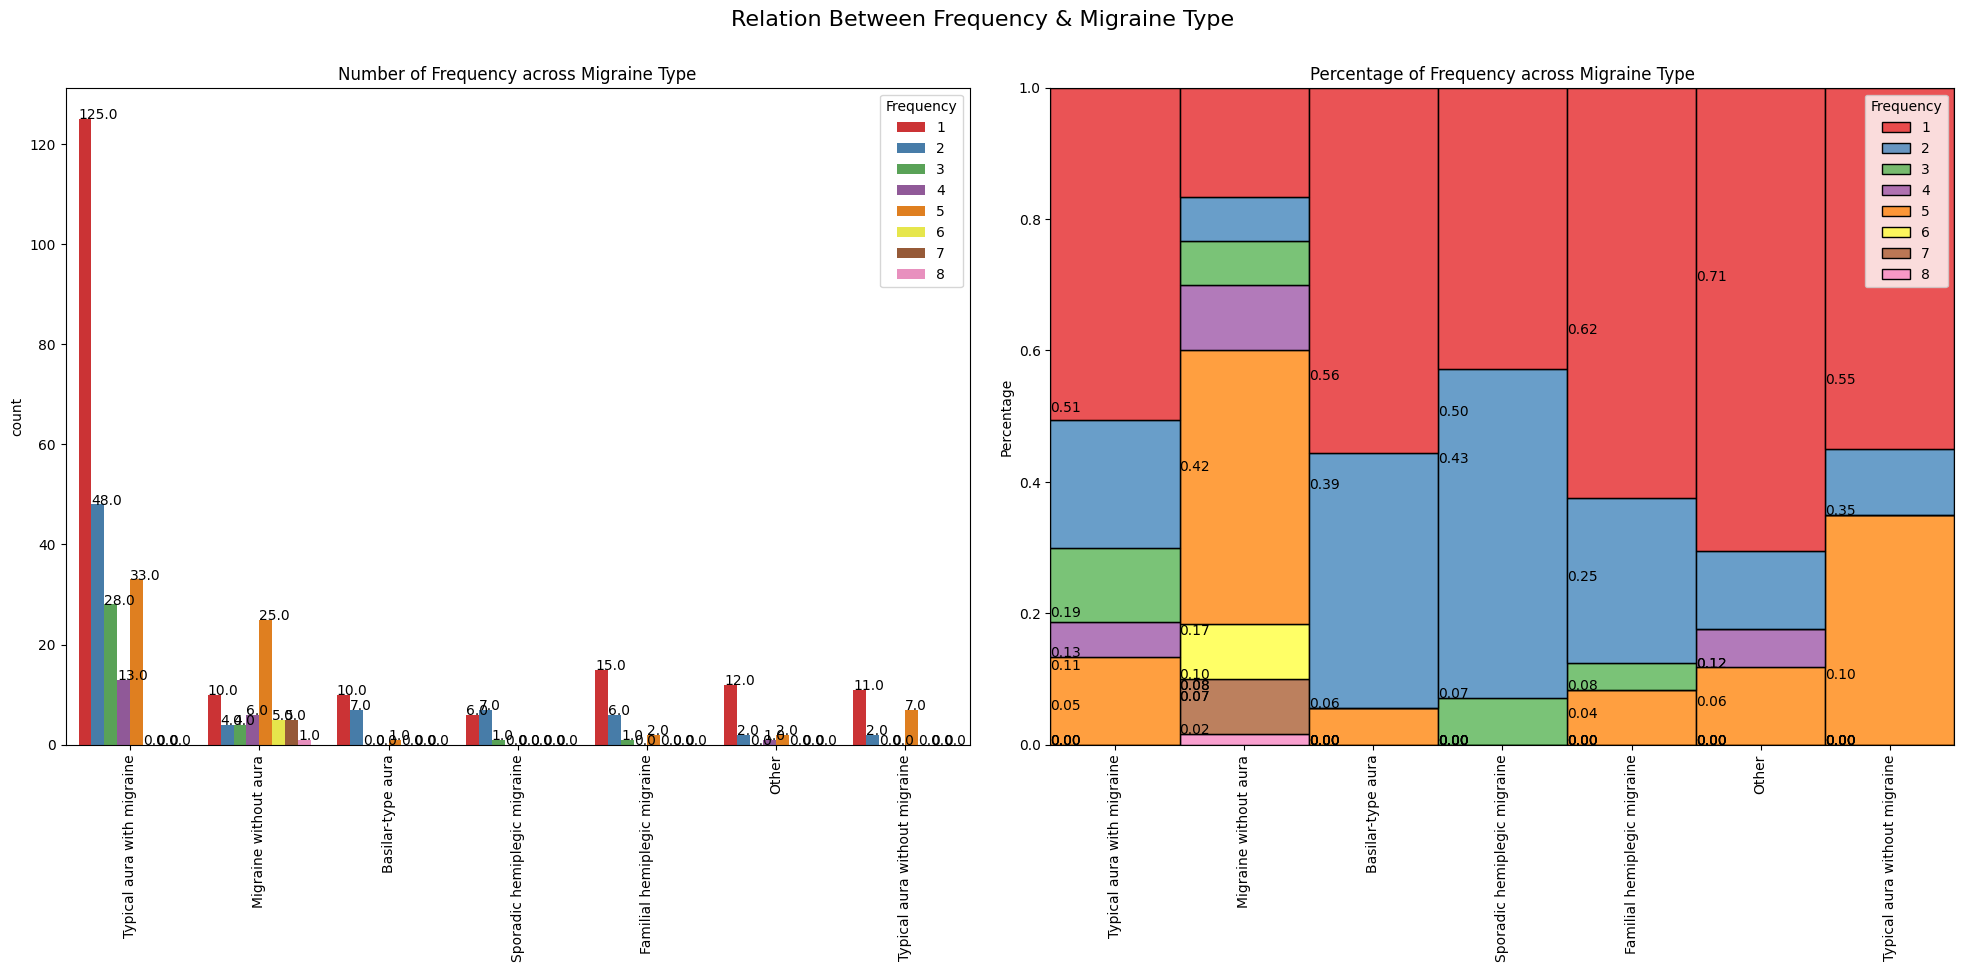

In [7]:
count_percentage_plot(df, 'Frequency', 'Type', "Relation Between Frequency & Migraine Type")

## __Location and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


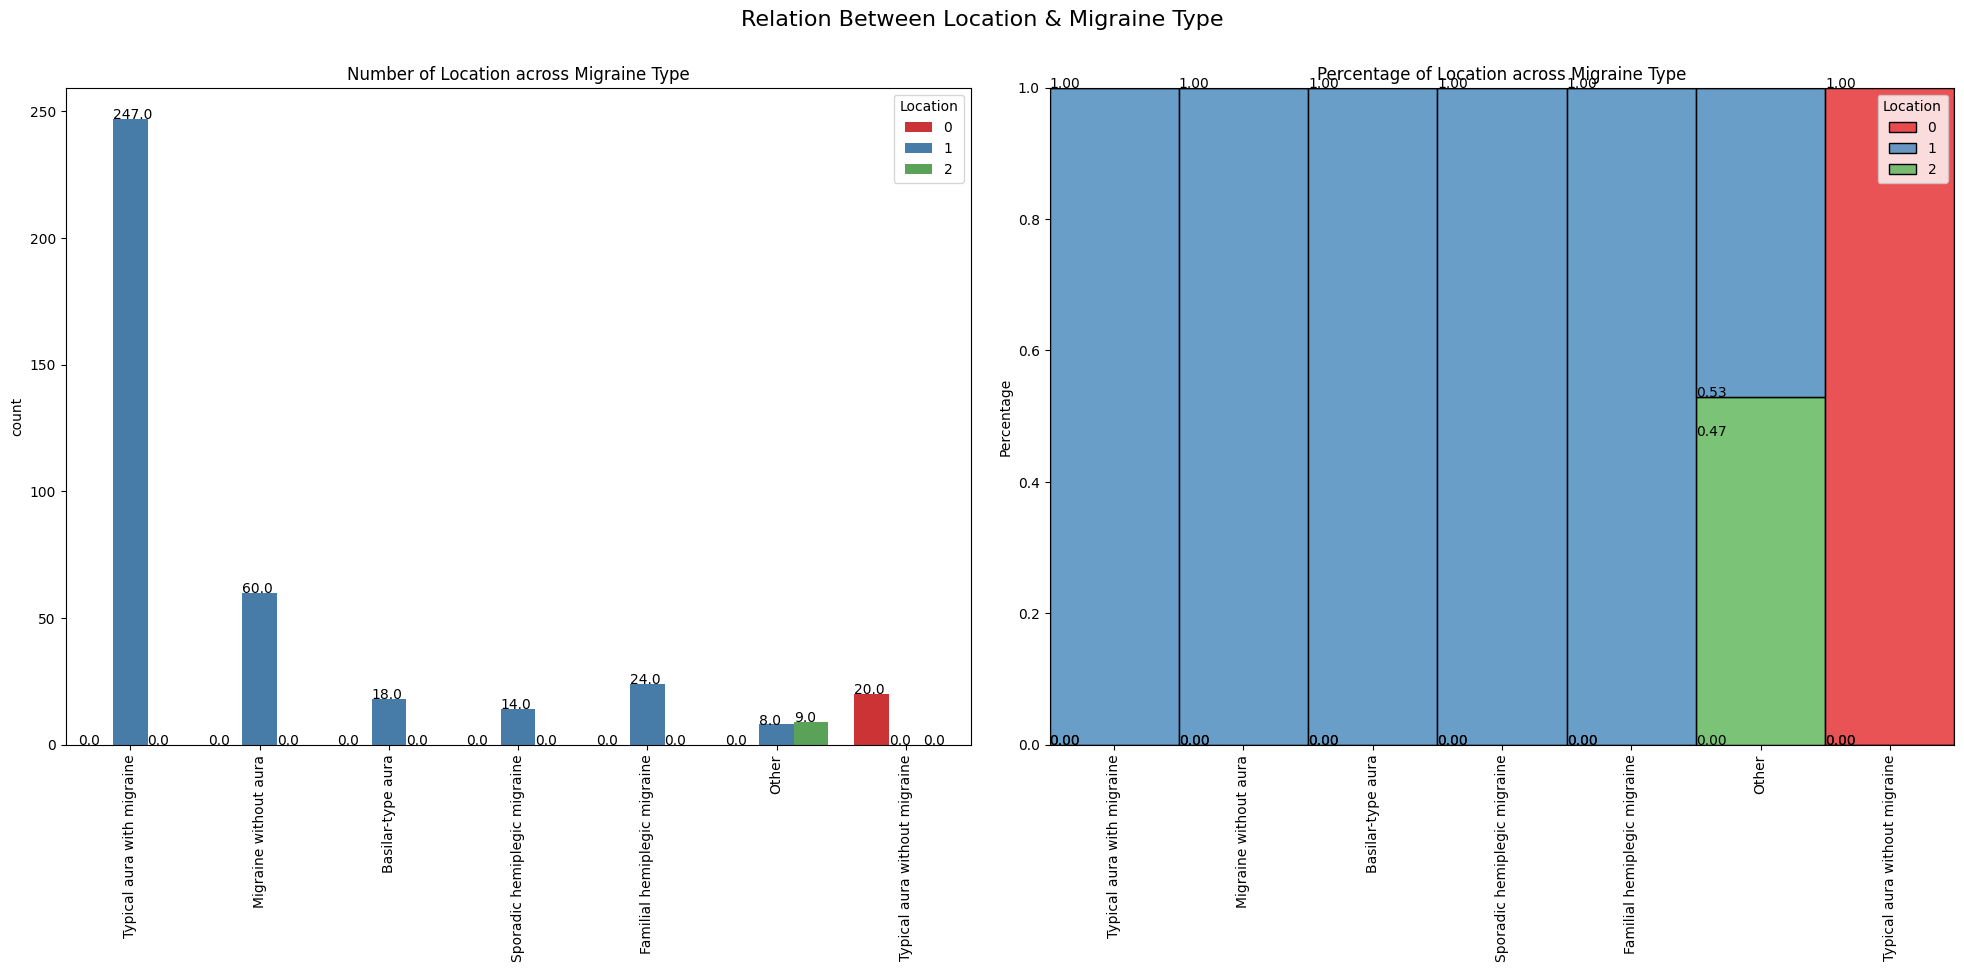

In [8]:
count_percentage_plot(df, 'Location', 'Type', "Relation Between Location & Migraine Type")

## __Character and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


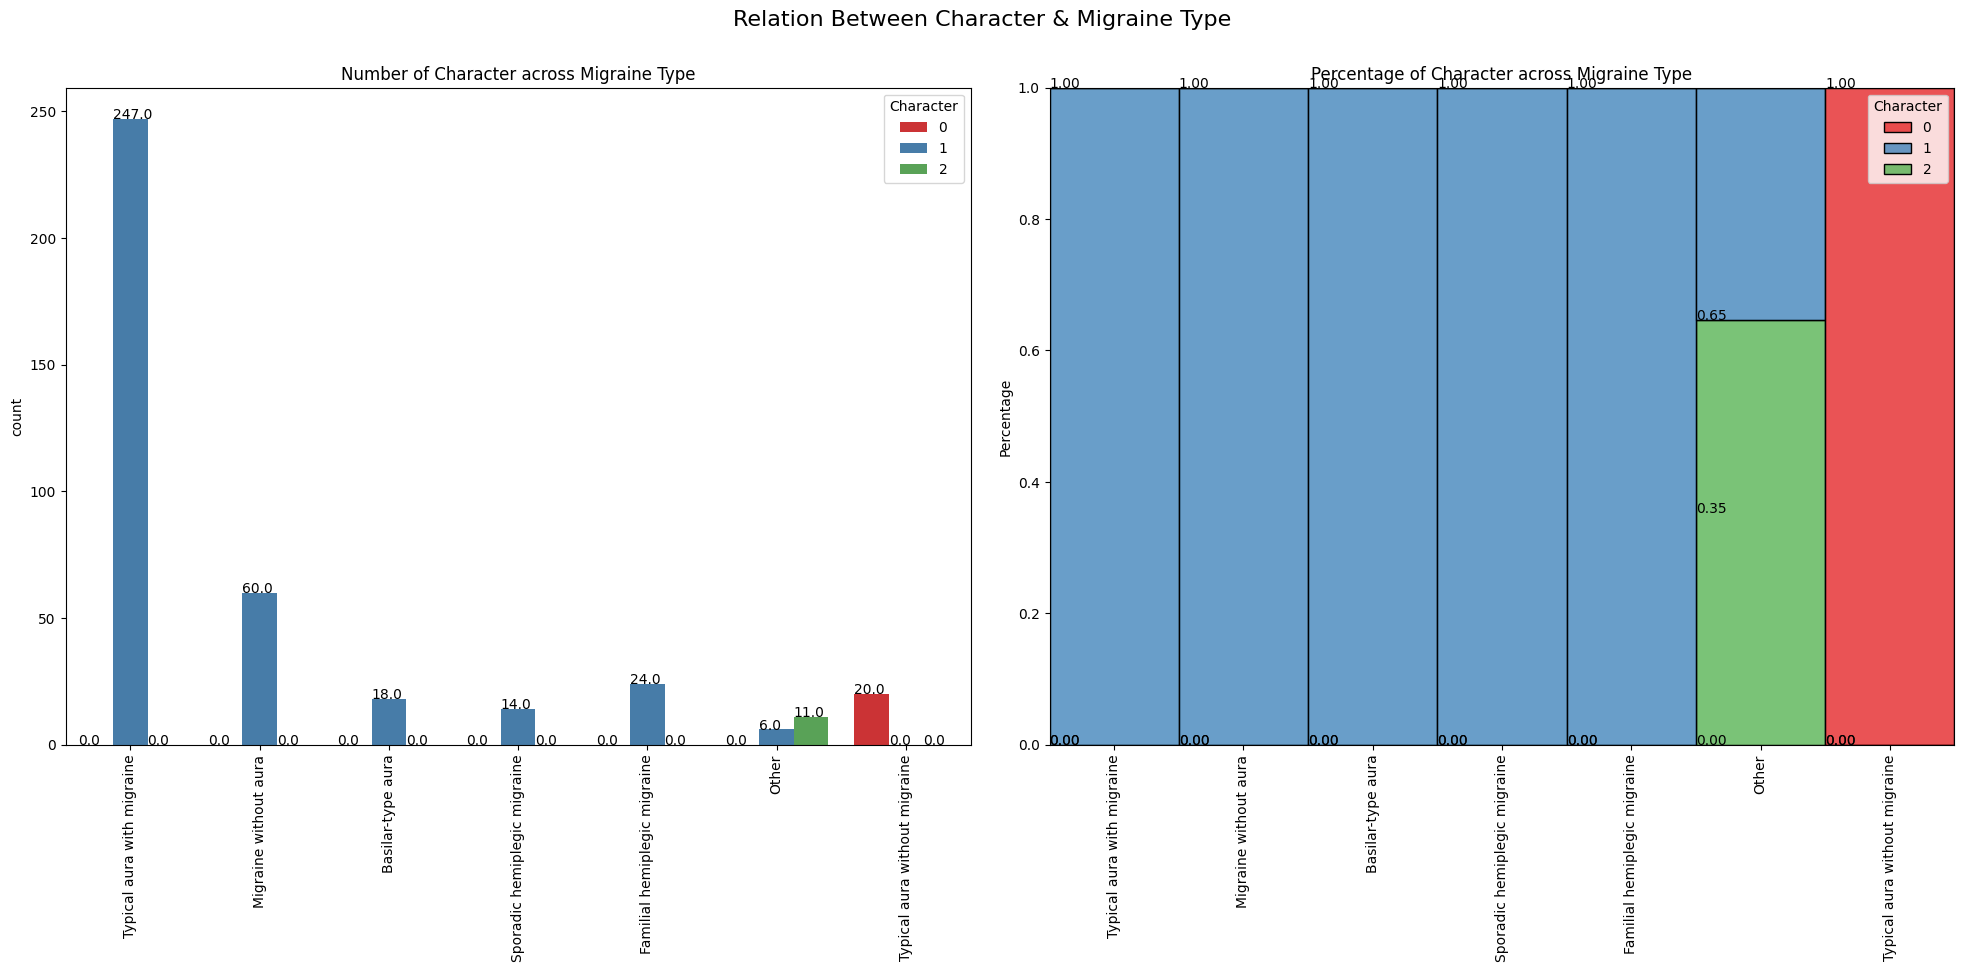

In [9]:
count_percentage_plot(df, 'Character', 'Type', "Relation Between Character & Migraine Type")

## __Intensity and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


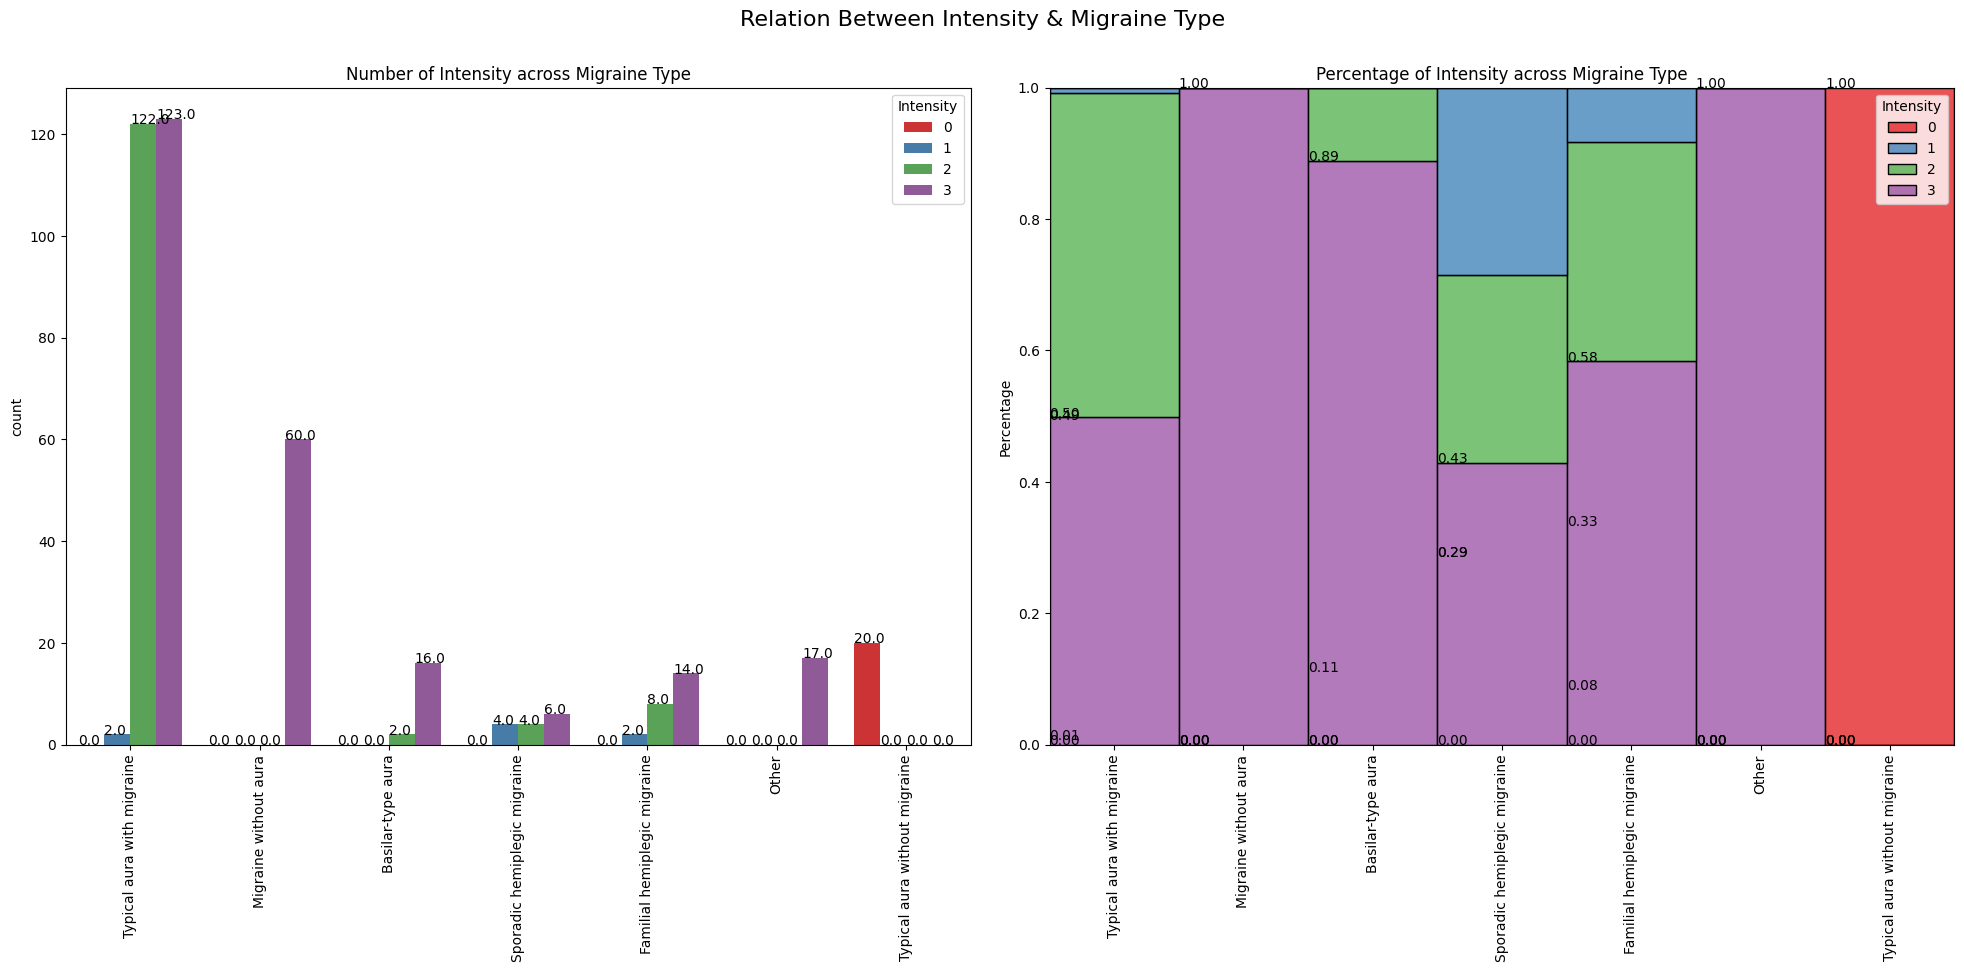

In [10]:
count_percentage_plot(df, 'Intensity', 'Type', "Relation Between Intensity & Migraine Type")

## __Nausea and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


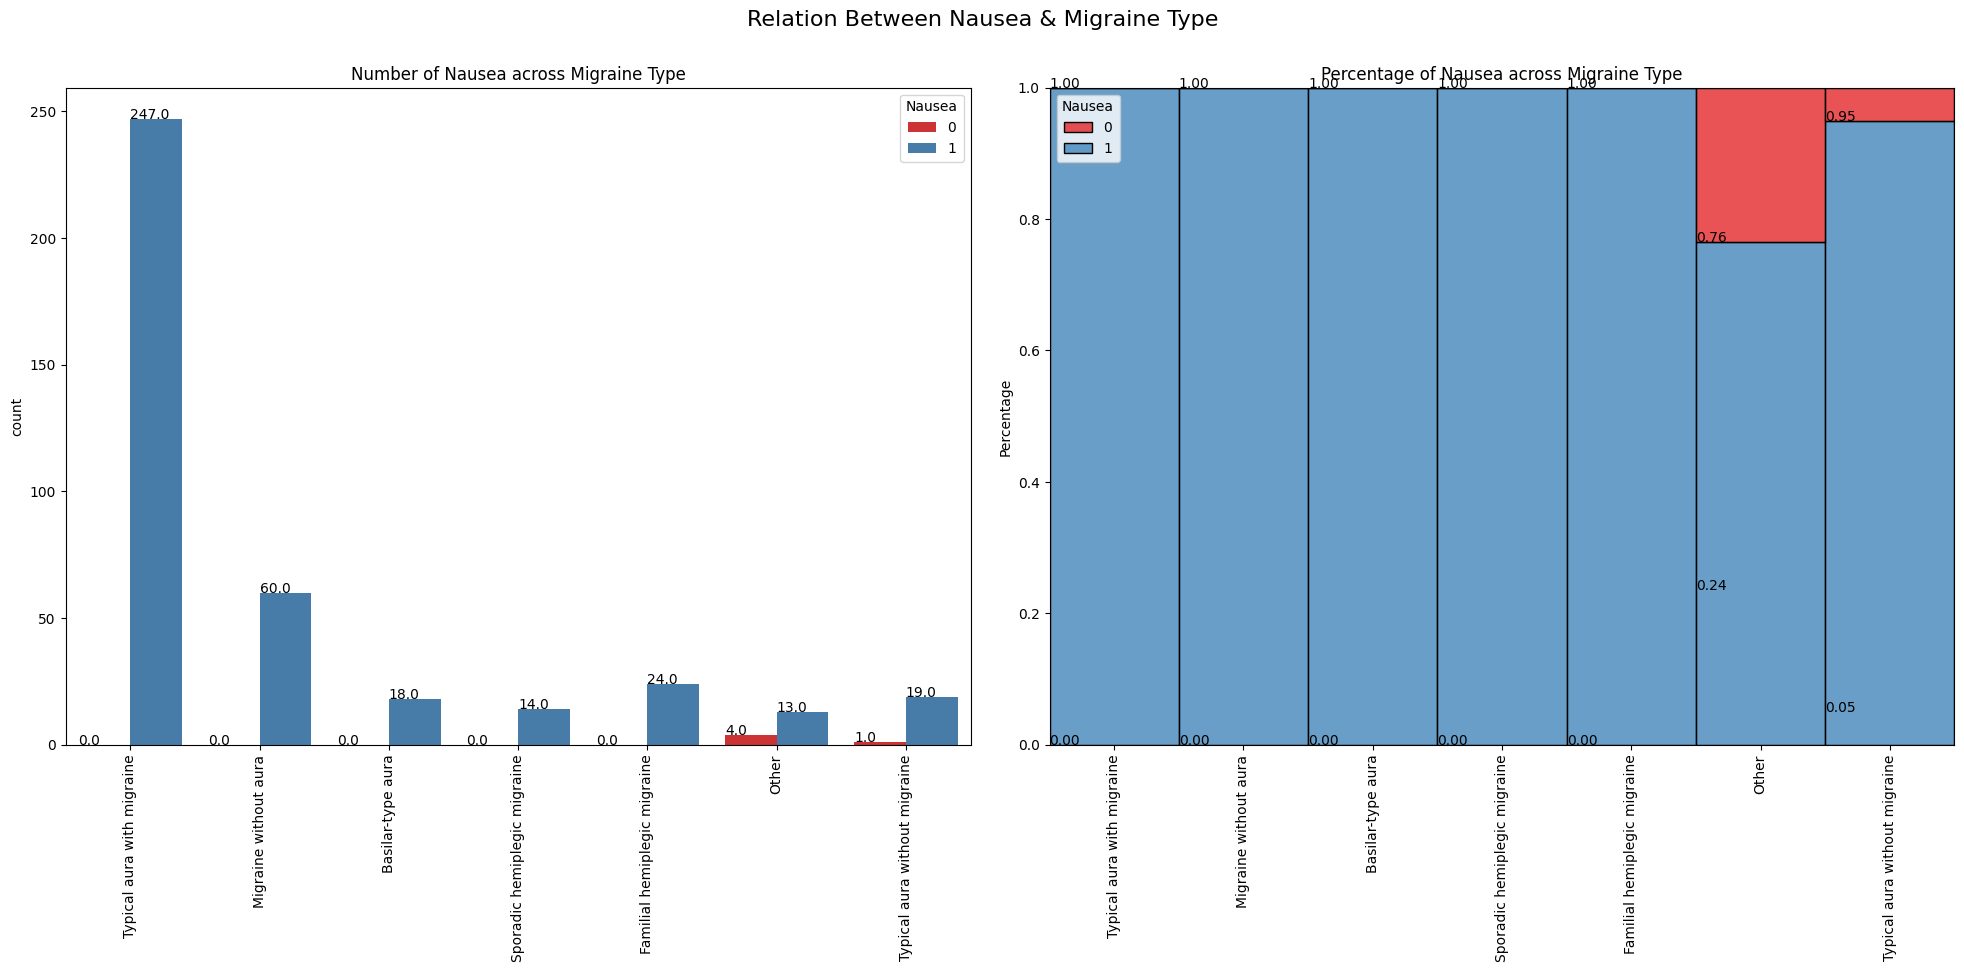

In [11]:
count_percentage_plot(df, 'Nausea', 'Type', "Relation Between Nausea & Migraine Type")

## __Vomit and Type__

In [12]:
count_percentage_plot(df, 'Vomit', 'Type', "Relation Between Vomit & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Phonophobia and Type__

In [13]:
count_percentage_plot(df, 'Phonophobia', 'Type', "Relation Between Phonophobia & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Photophobia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


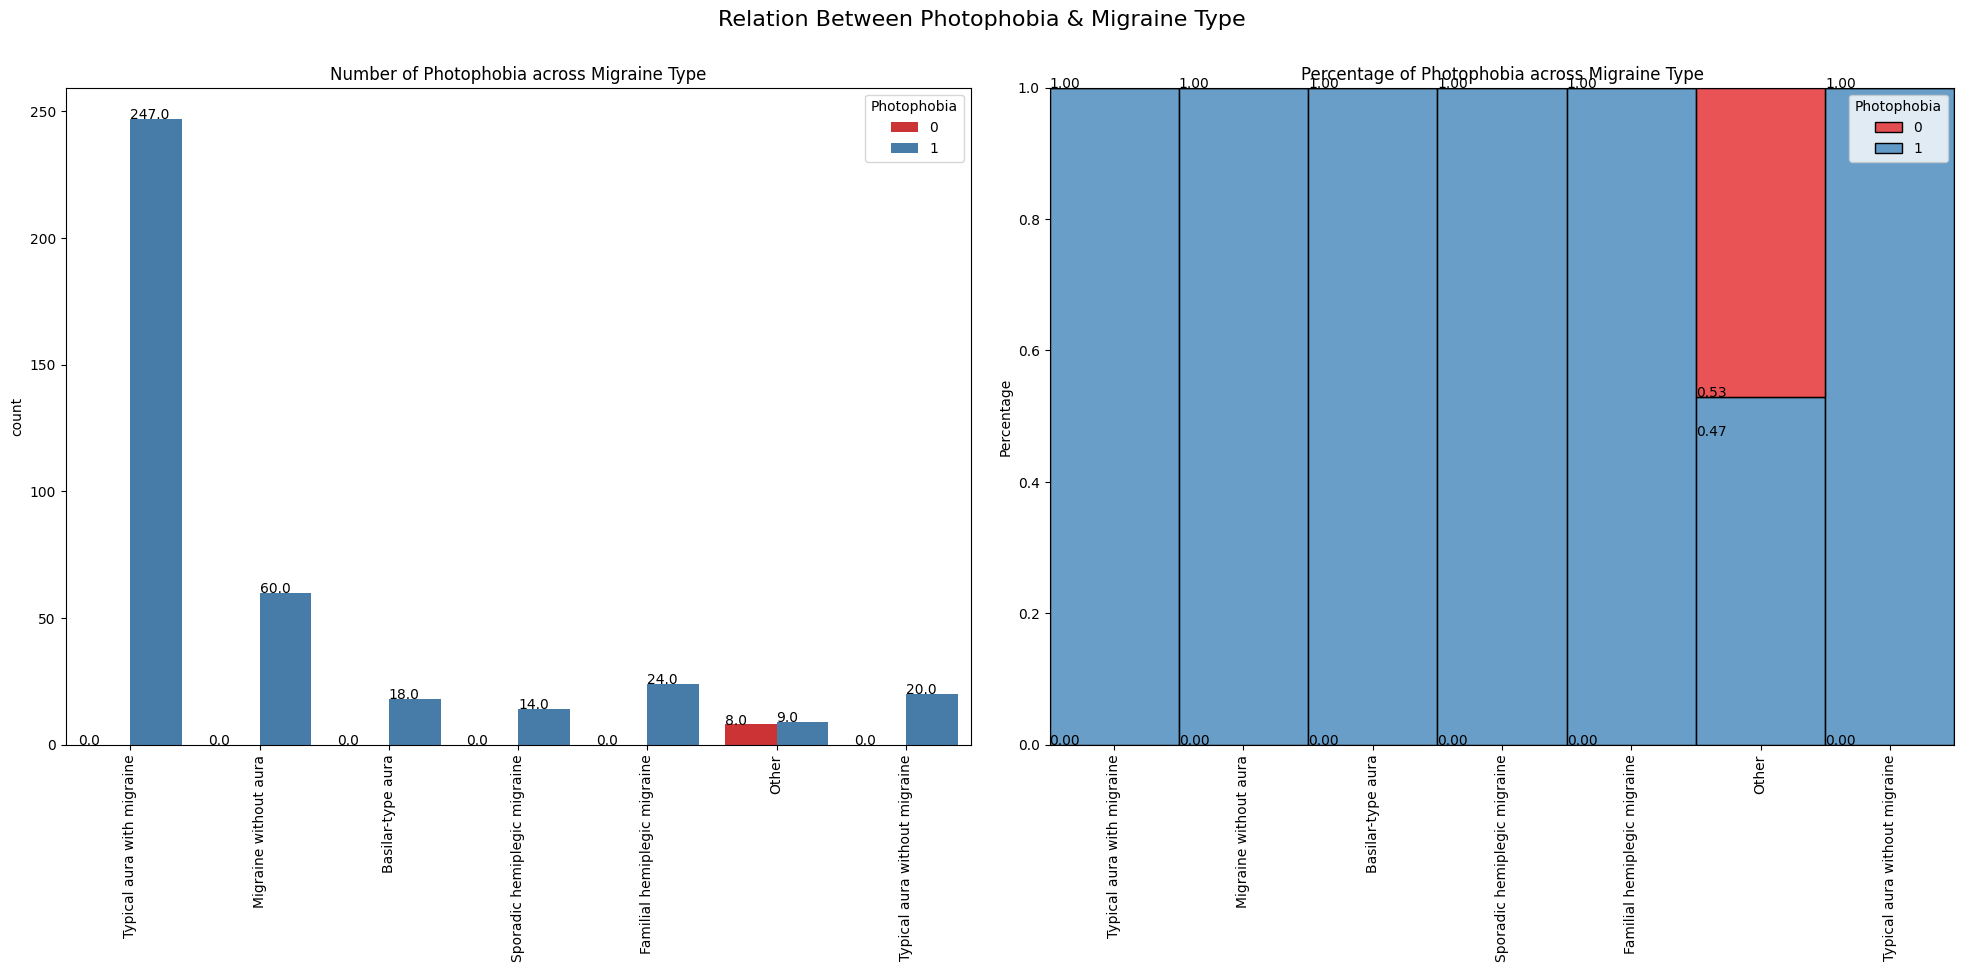

In [14]:
count_percentage_plot(df, 'Photophobia', 'Type', "Relation Between Photophobia & Migraine Type")

## __Visual and Type__

In [15]:
count_percentage_plot(df, 'Visual', 'Type', "Relation Between Visual & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Sensory and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


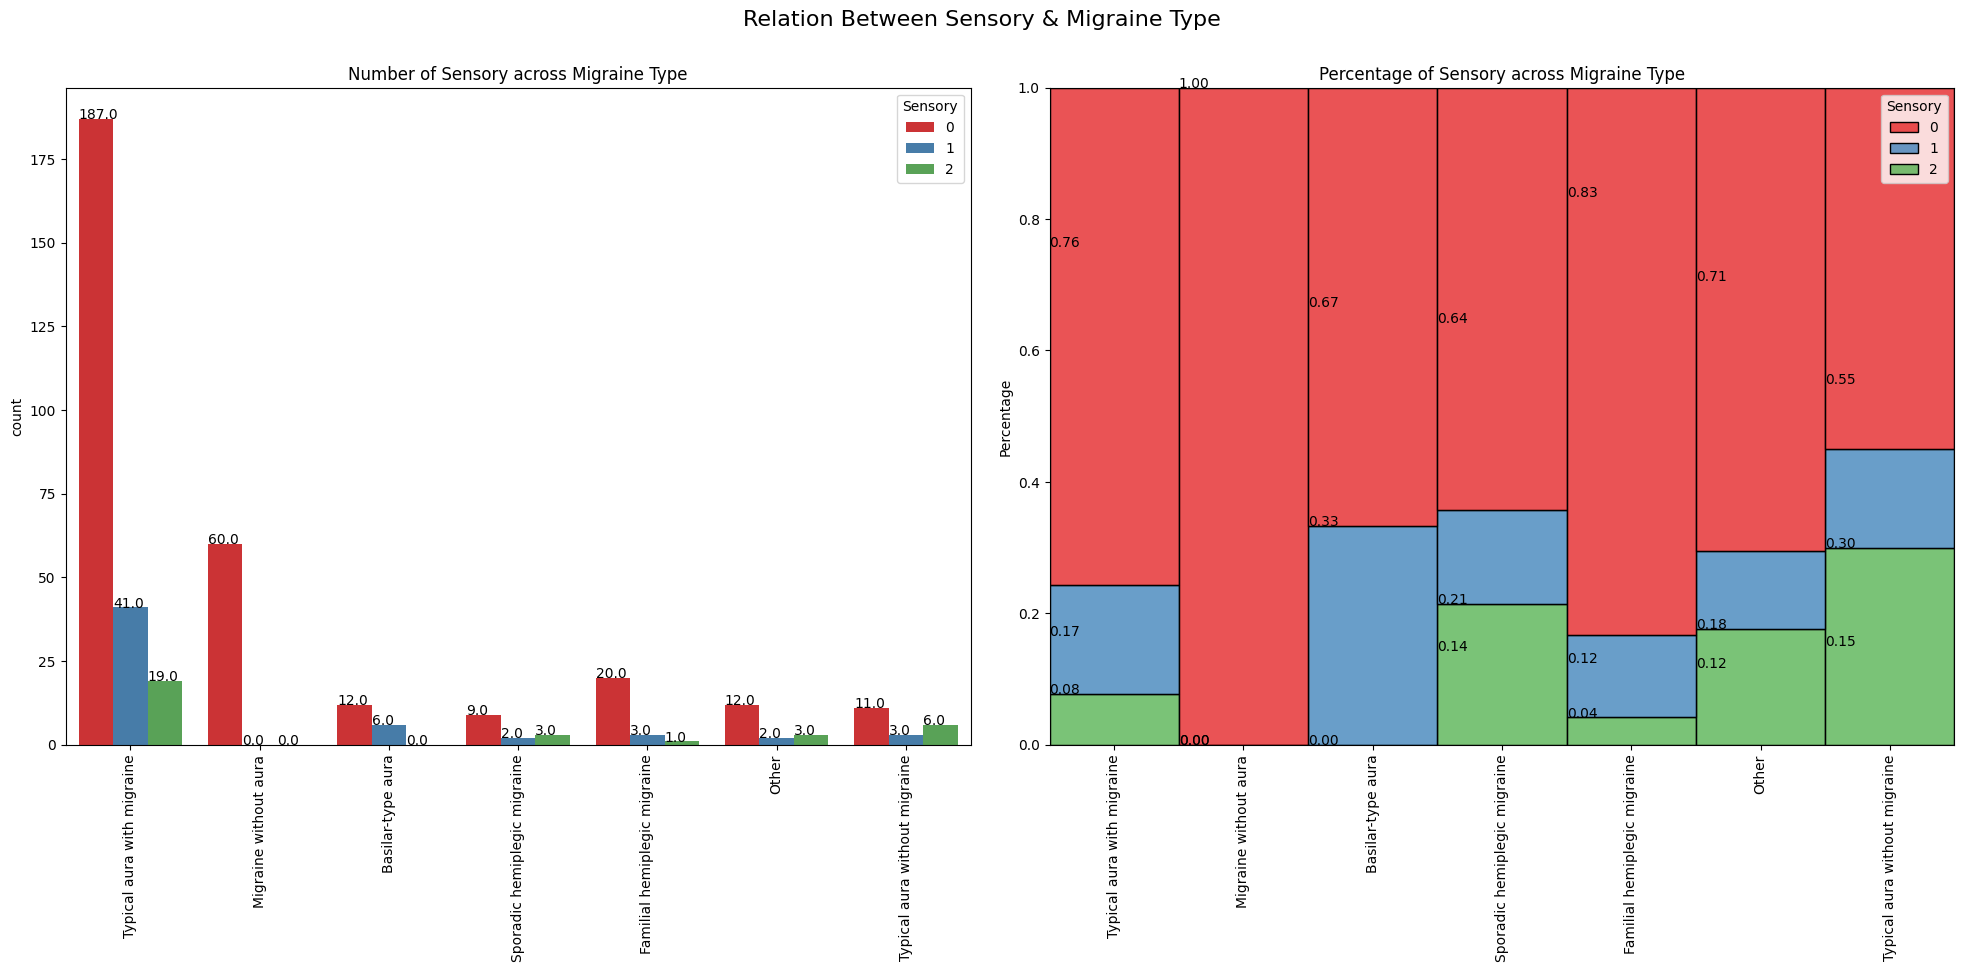

In [16]:
count_percentage_plot(df, 'Sensory', 'Type', "Relation Between Sensory & Migraine Type")

## __Dysphasia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


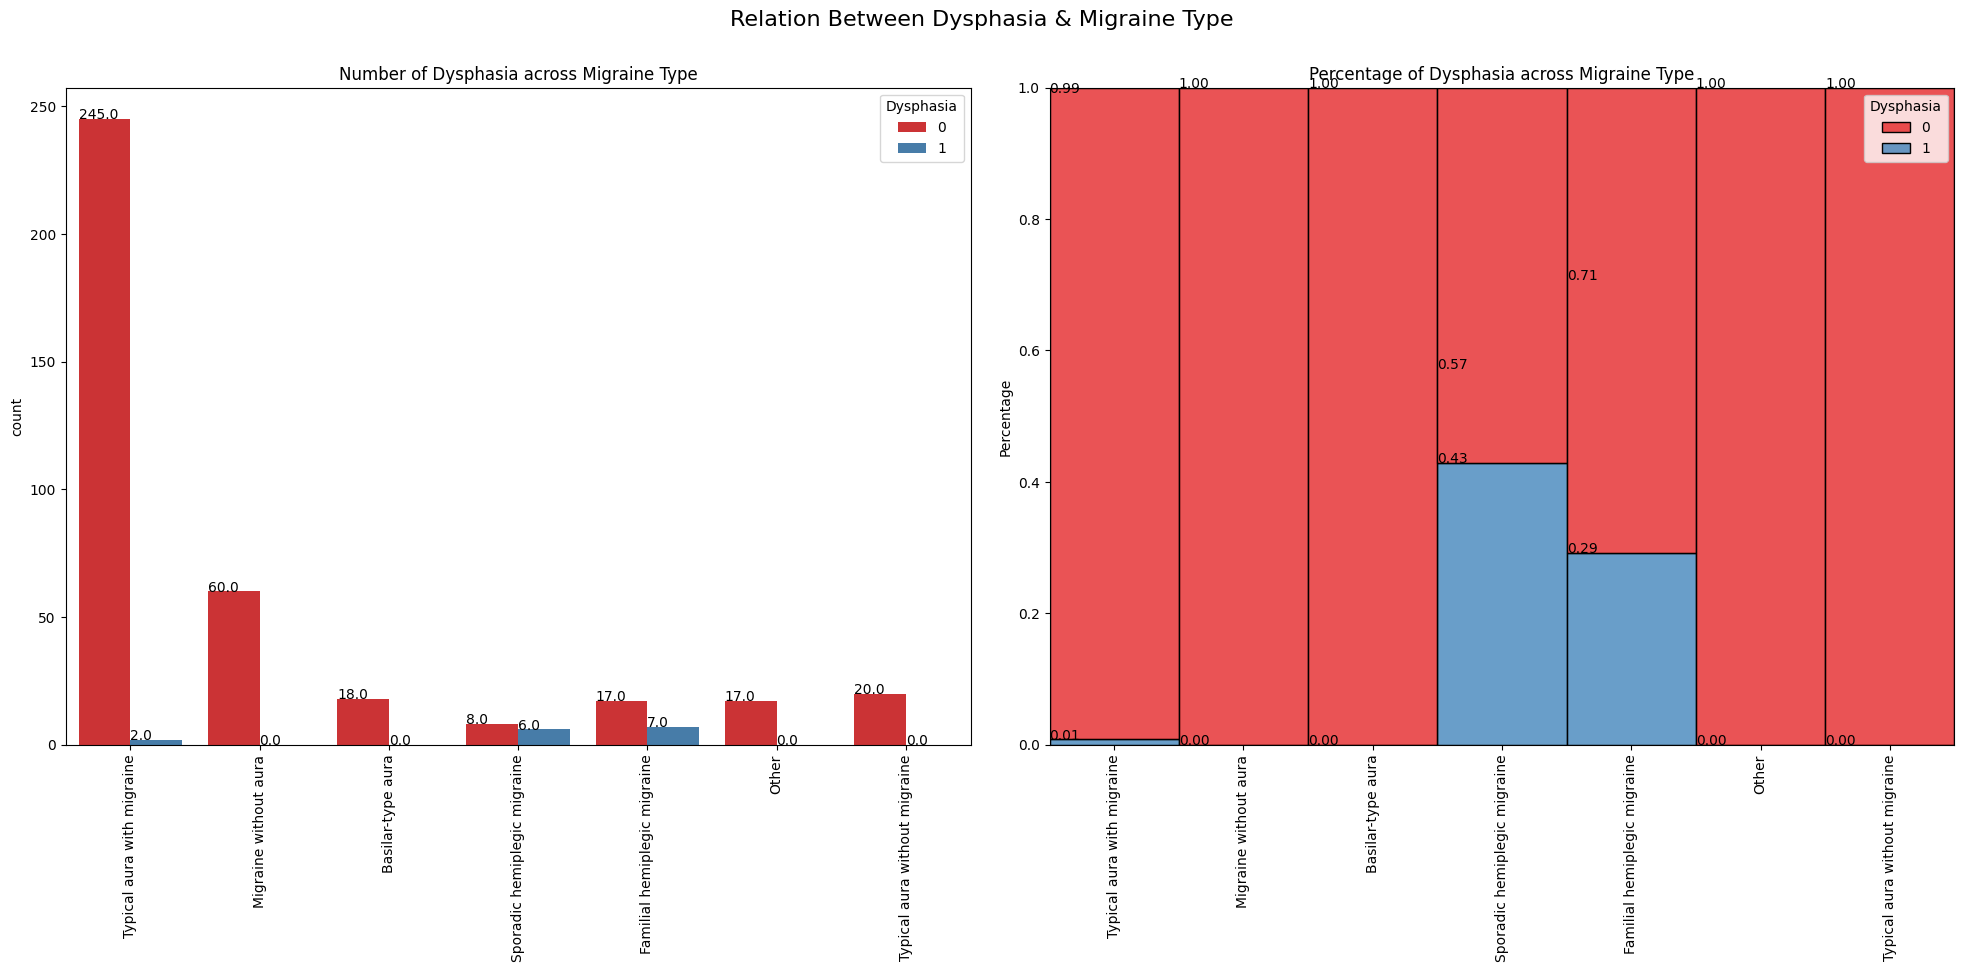

In [17]:
count_percentage_plot(df, 'Dysphasia', 'Type', "Relation Between Dysphasia & Migraine Type")

## __Dysarthria and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


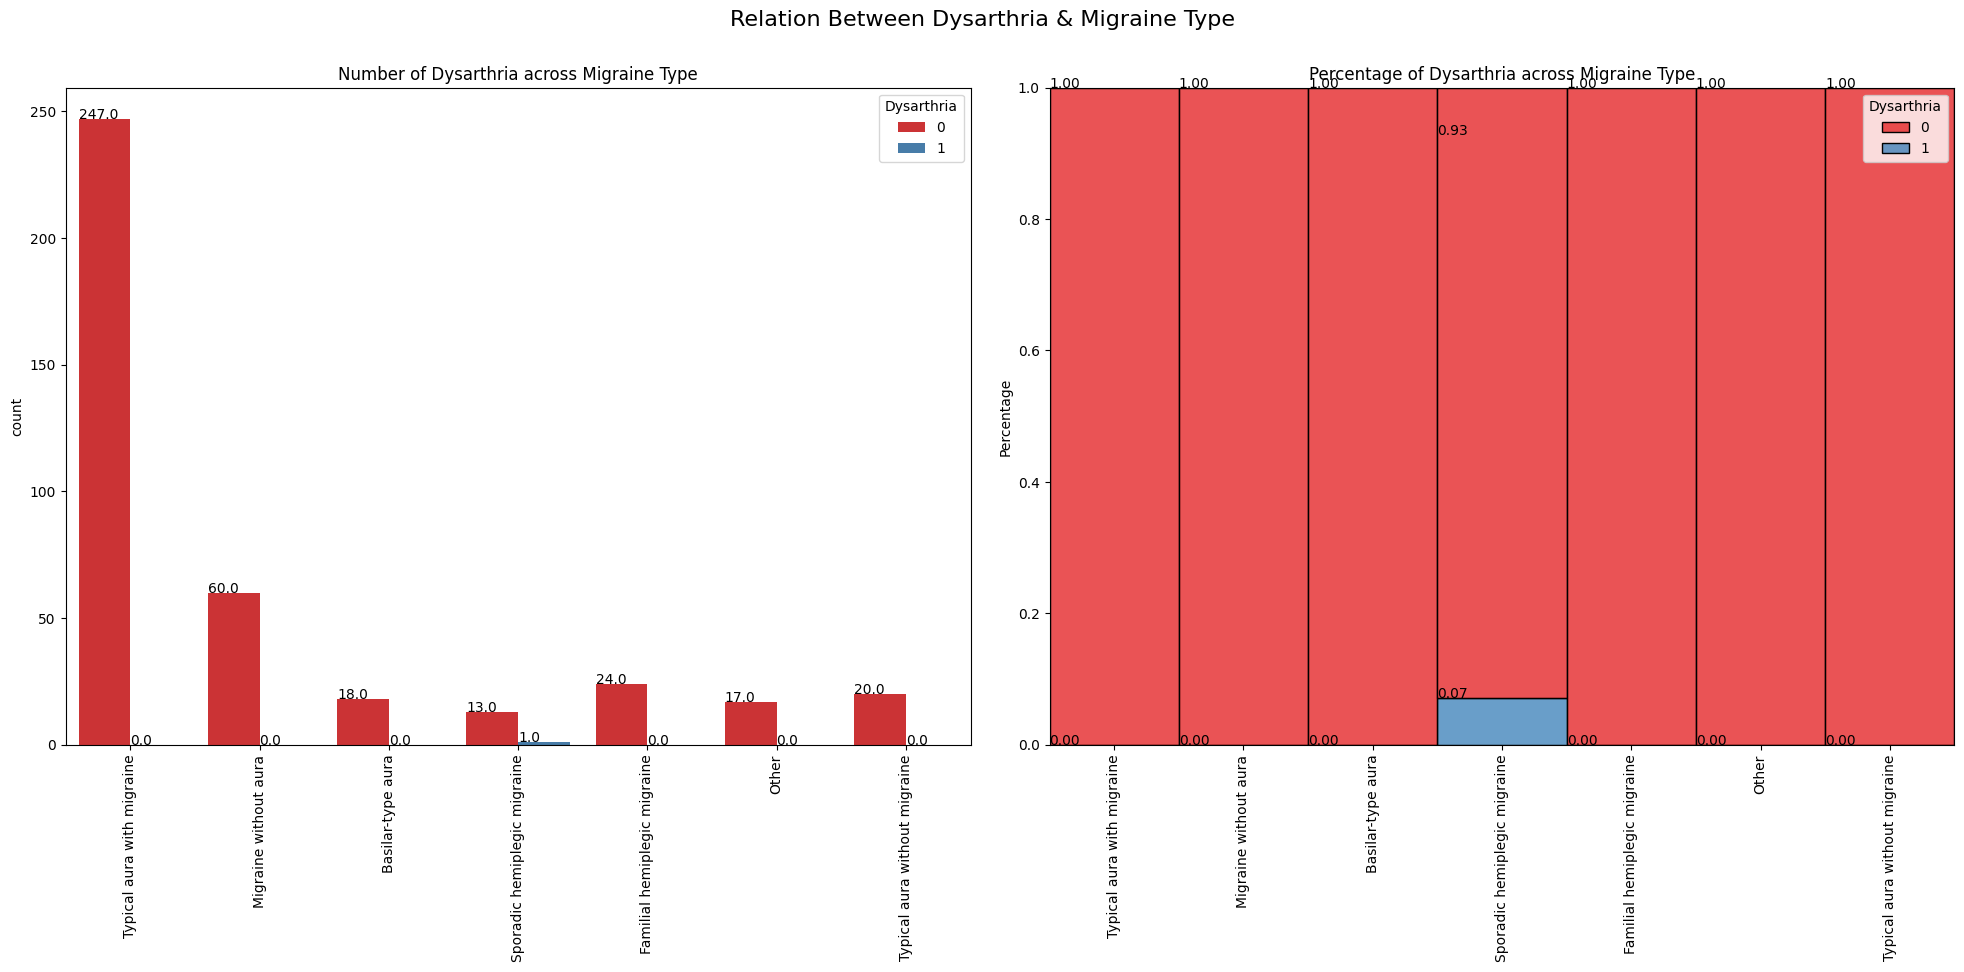

In [18]:
count_percentage_plot(df, 'Dysarthria', 'Type', "Relation Between Dysarthria & Migraine Type")

## __Vertigo and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


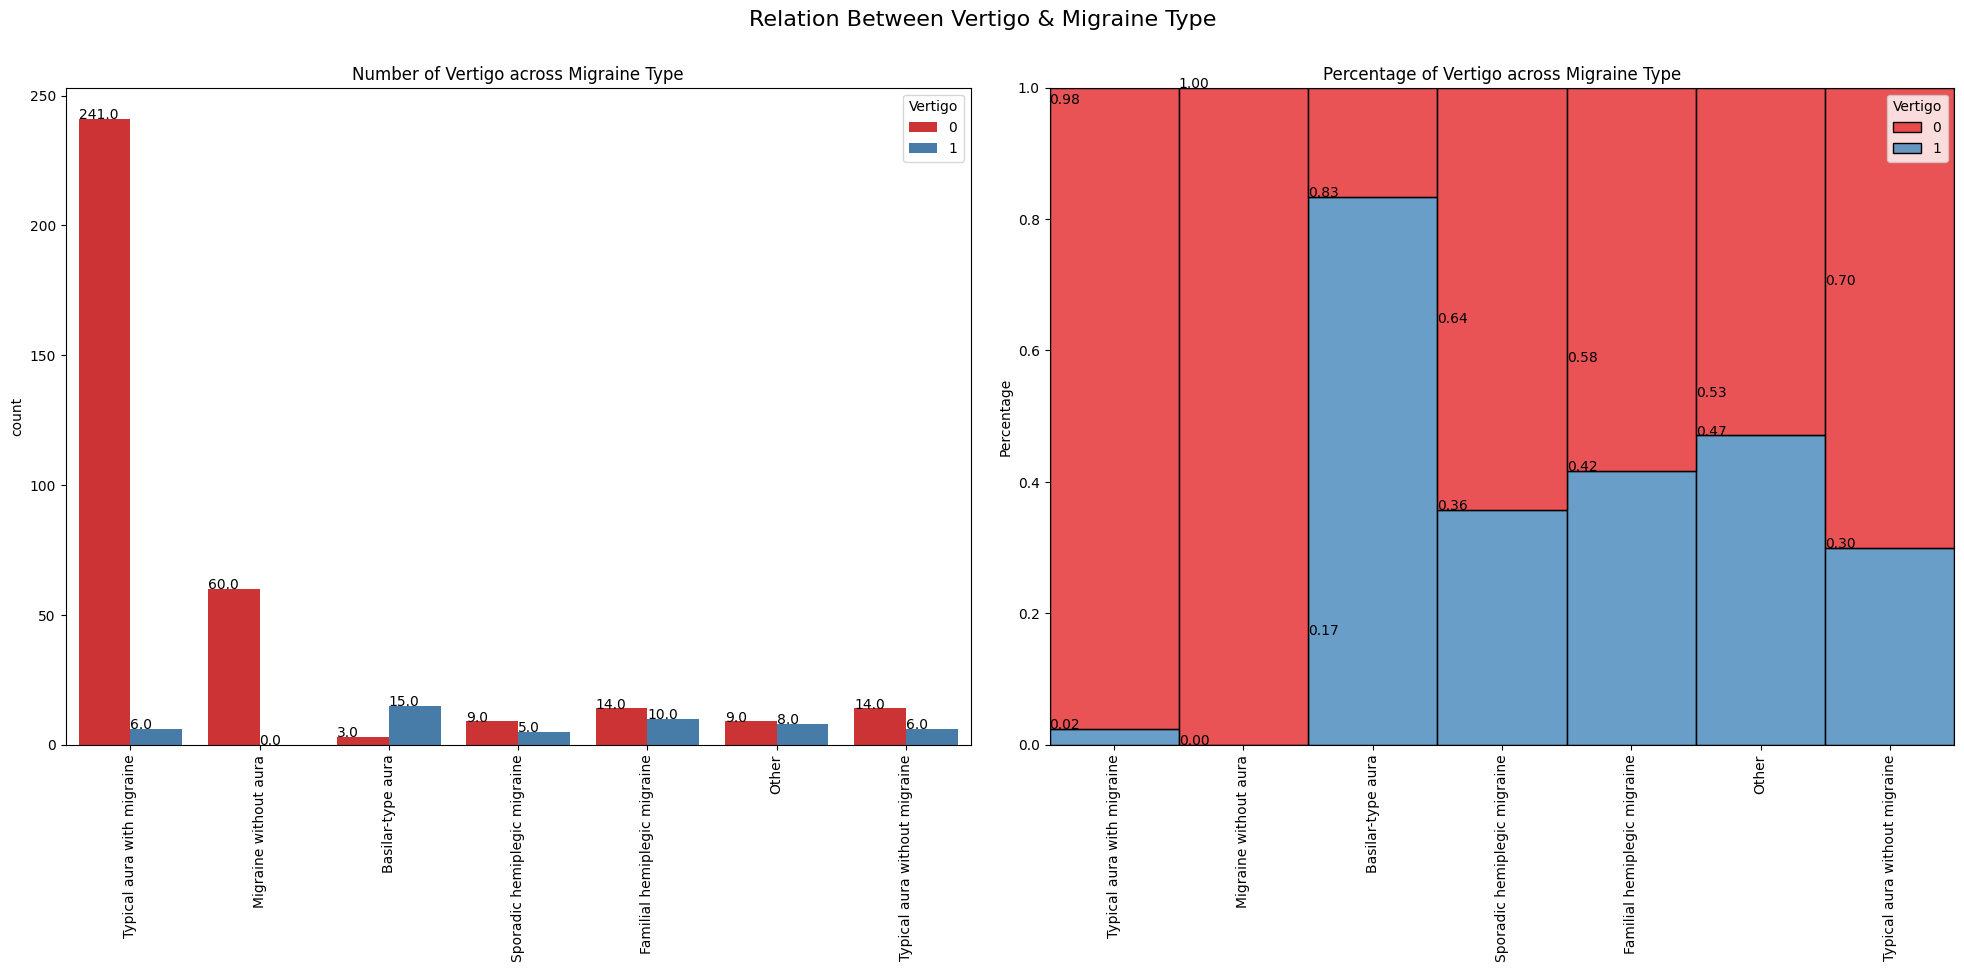

In [19]:
count_percentage_plot(df, 'Vertigo', 'Type', "Relation Between Vertigo & Migraine Type")

## __Tinnitus and Type__

In [20]:
count_percentage_plot(df, 'Tinnitus', 'Type', "Relation Between Tinnitus & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Hypoacusis and Type__

In [21]:
count_percentage_plot(df, 'Hypoacusis', 'Type', "Relation Between Hypoacusis & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Diplopia and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


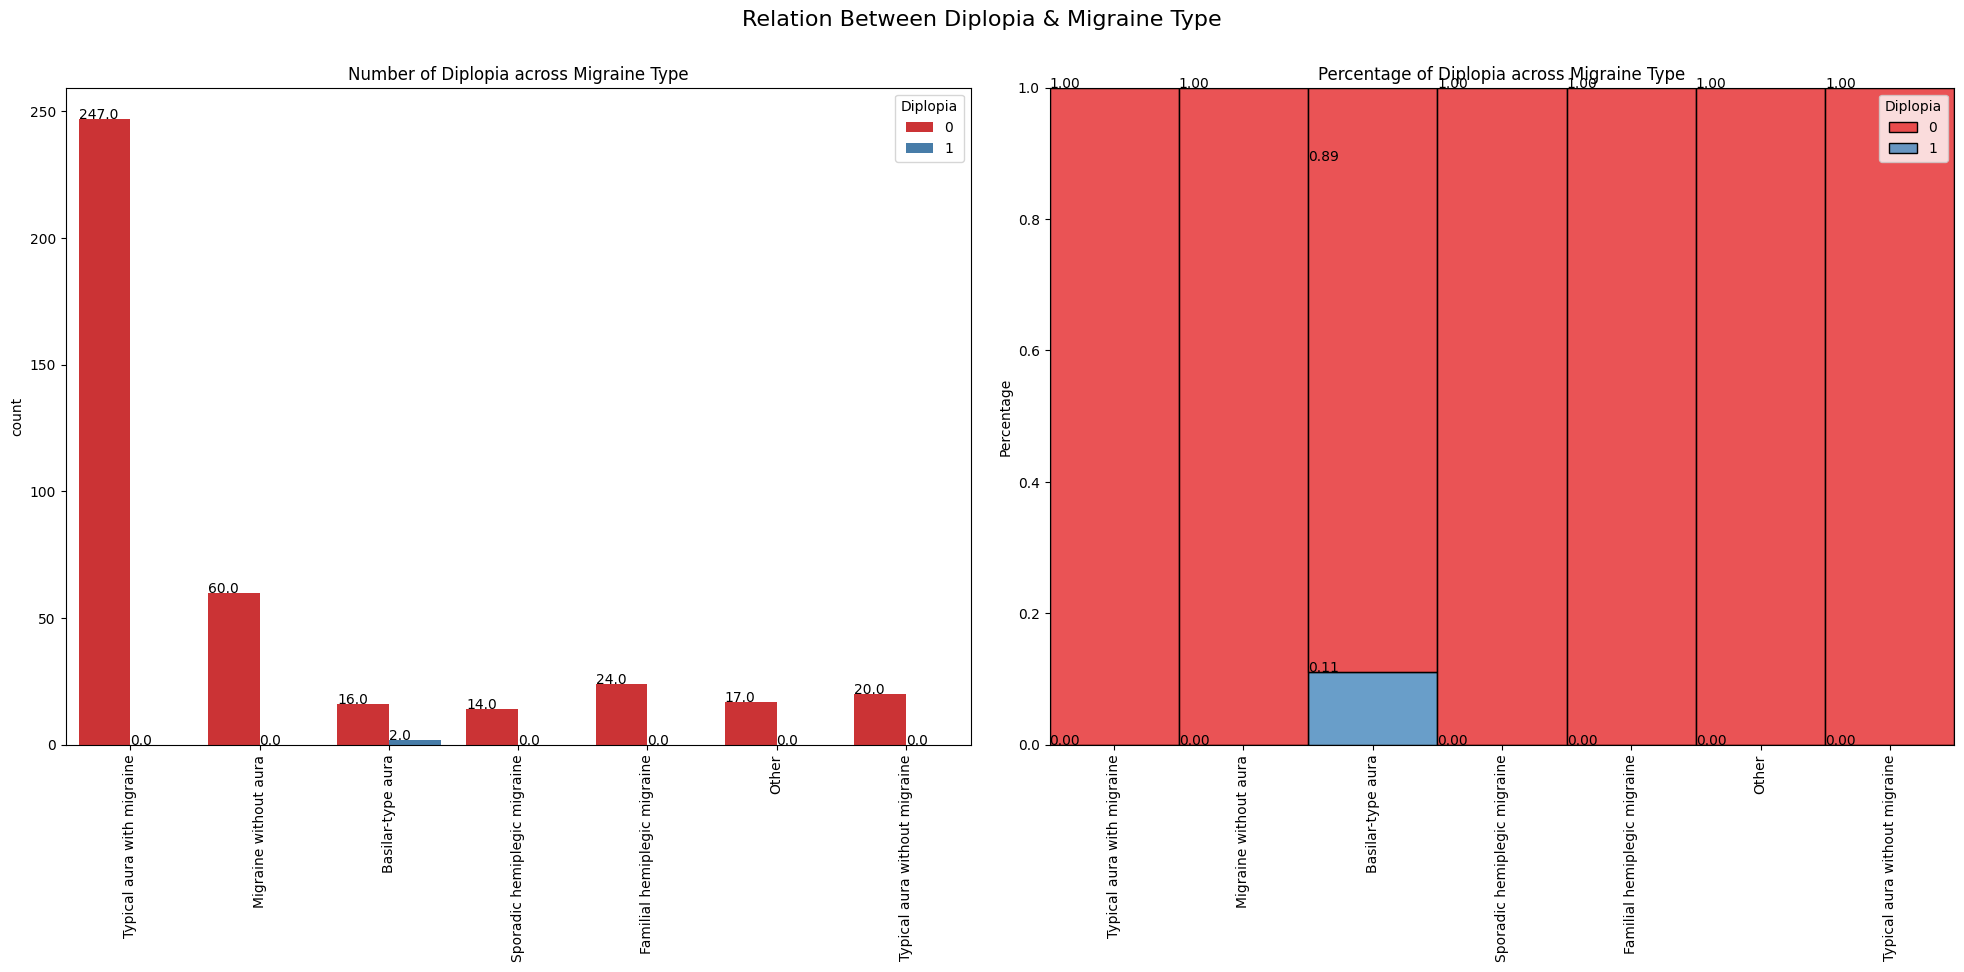

In [22]:
count_percentage_plot(df, 'Diplopia', 'Type', "Relation Between Diplopia & Migraine Type")

## __Defect and Type__

In [23]:
count_percentage_plot(df, 'Defect', 'Type', "Relation Between Defect & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Ataxia and Type__

In [24]:
count_percentage_plot(df, 'Ataxia', 'Type', "Relation Between Ataxia & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __Conscience and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


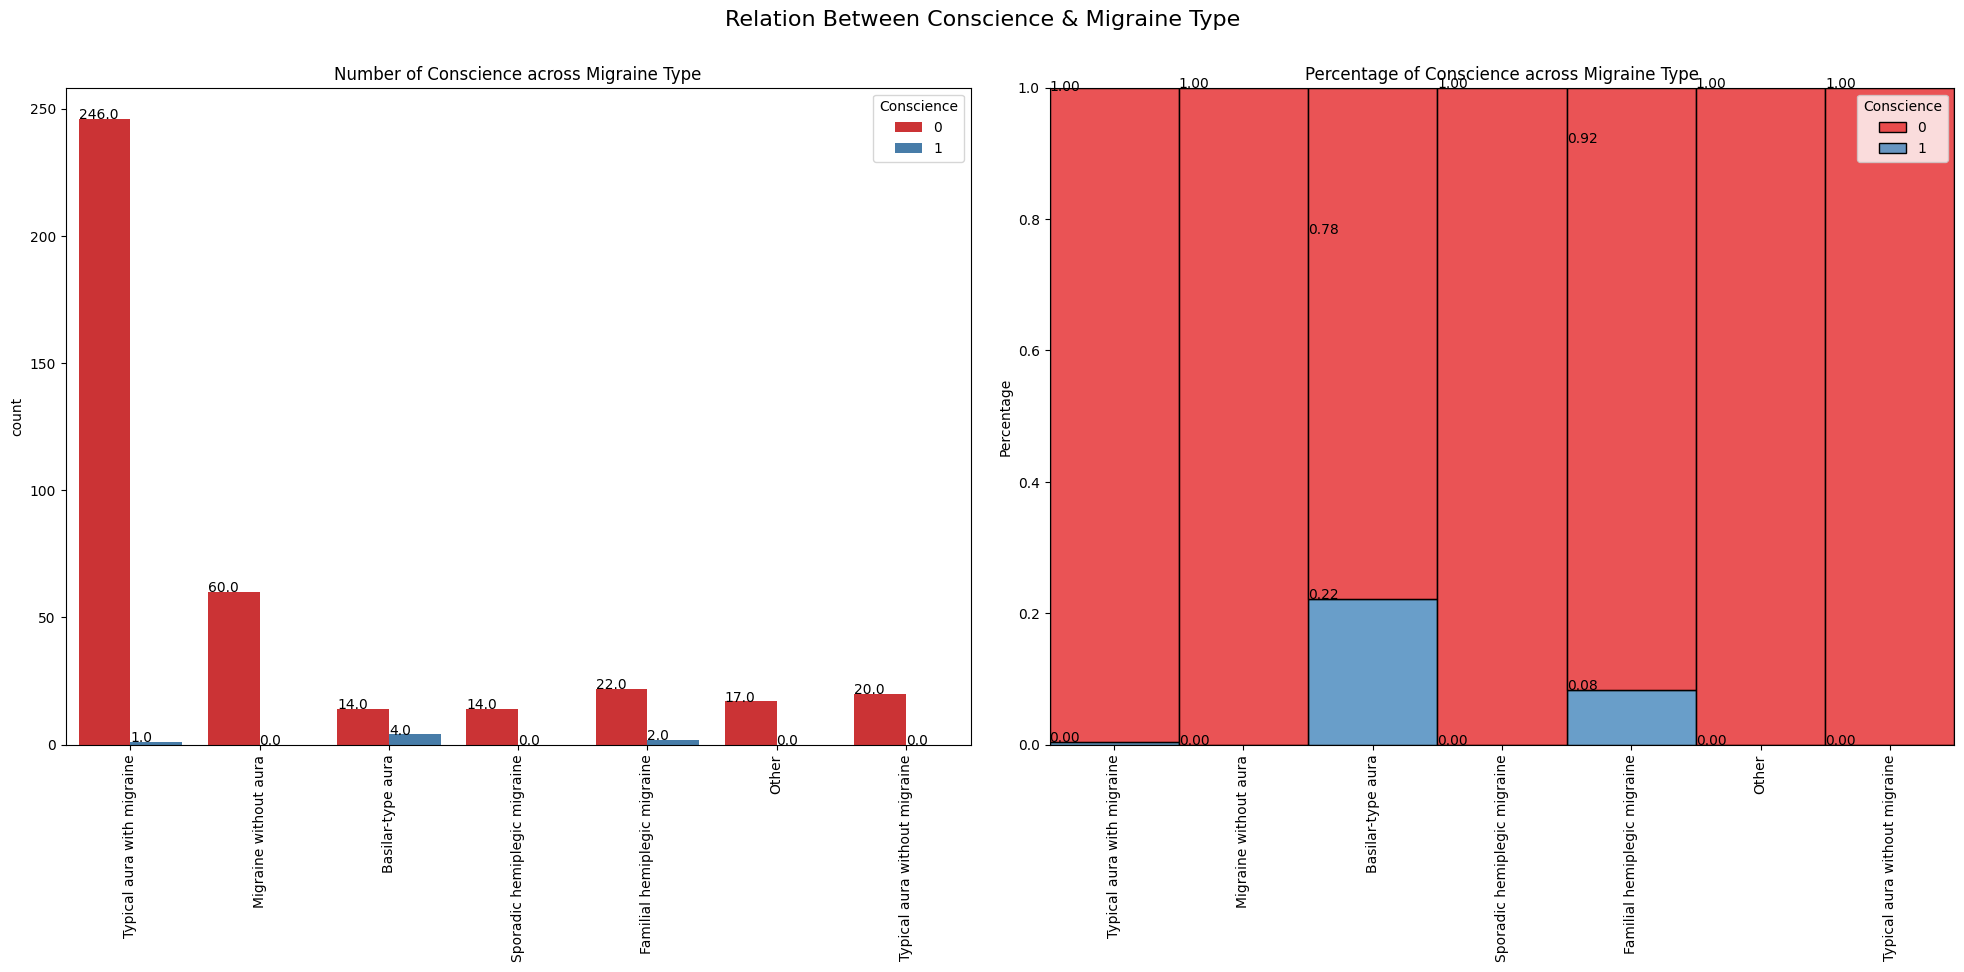

In [25]:
count_percentage_plot(df, 'Conscience', 'Type', "Relation Between Conscience & Migraine Type")

## __Paresthesia and Type__

In [26]:
count_percentage_plot(df, 'Paresthesia', 'Type', "Relation Between Paresthesia & Migraine Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


## __DPF and Type__

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\1632486721.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


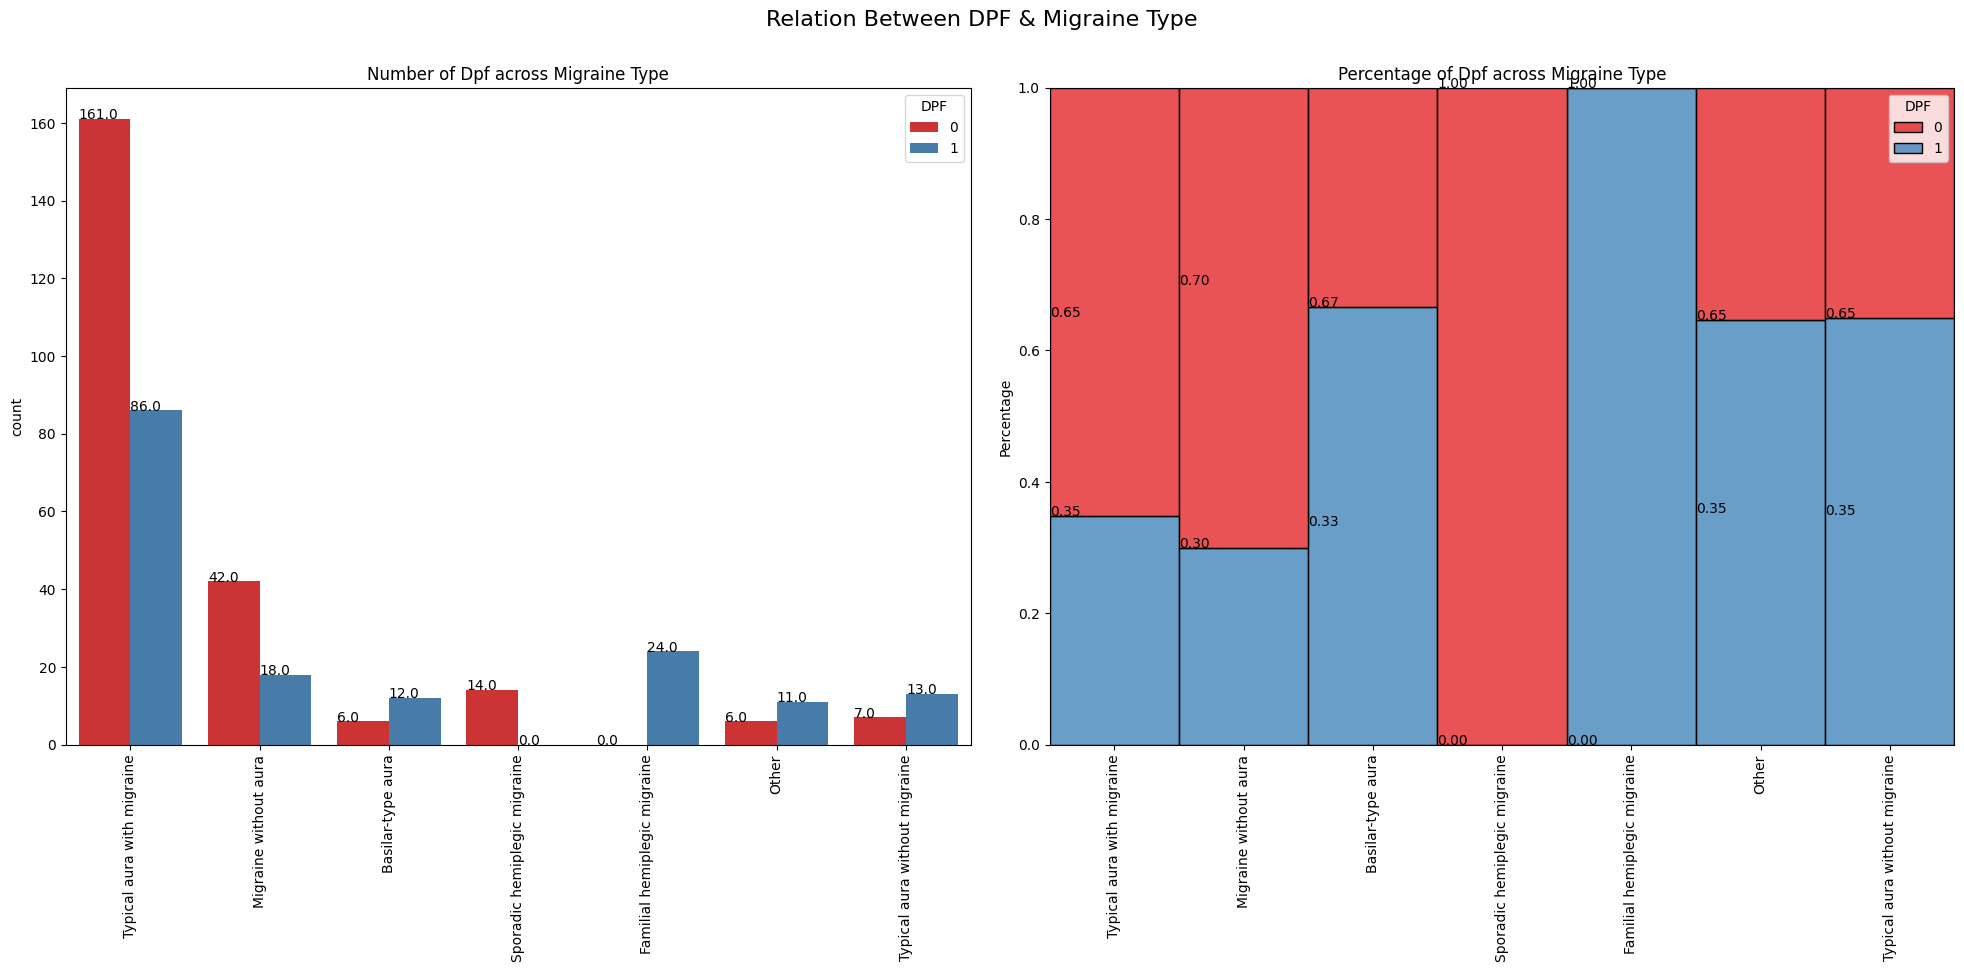

In [27]:
count_percentage_plot(df, 'DPF', 'Type', "Relation Between DPF & Migraine Type")

## ___Relation Between Continous Variable and Target___

## __Distribution of Age__

In [28]:
from matplotlib.pyplot import colorbar


def dist_summary(df,col,title,color="purple"):
    fig,ax = plt.subplots(3,1, figsize=(15,8),sharex=True)
    # Histogram plot
    sns.histplot(df[col], kde=True, ax=ax[0], color=color)
    ax[0].set(xlabel=None)
    ax[0].set_title("KDE Plot")
    
    # Box Plot
    sns.boxplot(df[col], ax=ax[1], color=color)
    ax[1].set(xlabel=None)
    ax[1].set_title("Box Plot")
    
    # Violon Plot
    sns.violinplot(df[col],ax=ax[2], color=color)
    ax[2].set(xlabel=None)
    ax[2].set_title("Violin Plot")
    
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(pad=3)
    plt.show()

In [29]:
def hist(df,col):
    plt.figure(figsize=(15,10))
    plt.title("Distribution Of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    sns.histplot(df[col], color='purple')
    plt.show()

In [30]:
hist(df,"Age")
dist_summary(df,"Age", "Distribution Of Feature Age")

## __Relation between Migraine Type & Age__

In [31]:
def cat_hist_plot(df,x,target):
    fig,ax = plt.subplots(4,4, figsize=(20,20))
    
    labels = [i for i in df[target].unique() for x in (0,1)]
    row,col = 0,0
    
    fig.delaxes(ax[3][2])
    fig.delaxes(ax[3][3])
    
    plt.suptitle("Distribution Of Age Across All Migraine Types", fontsize=20)
    
    for label in labels:
        if row == 4:
            break
            
        if col%2 == 0:
            ax[row,col].set_title(f"KDE OF AGE FOR {label.upper()}")
            sns.kdeplot(df[df[target]==label]['Age'],ax=ax[row,col], shade=True, color='purple')
            col+=1
            
        else:
            ax[row,col].set_title(f"BOXPLOT OF AGE FOR {label.upper()}")
            sns.boxplot(y=df[df[target]==label]['Age'],ax=ax[row,col], color='pink')
            if col == 3:
                col = 0
                row += 1
                continue
                
            col+=1
            
    
    plt.tight_layout(pad=4)
    plt.show()

In [32]:
cat_hist_plot(df,x="Age",target="Type")

C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\2717031471.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target]==label]['Age'],ax=ax[row,col], shade=True, color='purple')
C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\2717031471.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target]==label]['Age'],ax=ax[row,col], shade=True, color='purple')
C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\2717031471.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target]==label]['Age'],ax=ax[row,col], shade=True, color='purple')
C:\Users\bokad\AppData\Local\Temp\ipykernel_23840\2717031471.py:18:

## __Label Encoding the Target Variable__

In [33]:
# Initilize LabelEncoder object
le = LabelEncoder()

# Fit transfrom the Type feature
df['Type'] = le.fit_transform(df["Type"])

# Print the head of data
df.head()

Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF  Type  
0       0       0           0            0    0     5  
1       0       0           0            0    0     5  
2       0       0           0            0    0     5  
3       0       0           0            0    0     5  
4       0       0           0            0    1     5  

[5 rows x 24 columns]

## __Balancing the imbalance data using unsampling__

In [34]:
def cat_count_plot(df,col):
    # set figsize and plot
    plt.figure(figsize=(15,8))
    plt.title(f"Count of categories of column {col}")
    ax = sns.countplot(df[col], palette='Set2')
    ax.set_xlabel("Categories")
    ax.set_ylabel("Number of categories")
    # Annotate each bar
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()))
    plt.show()

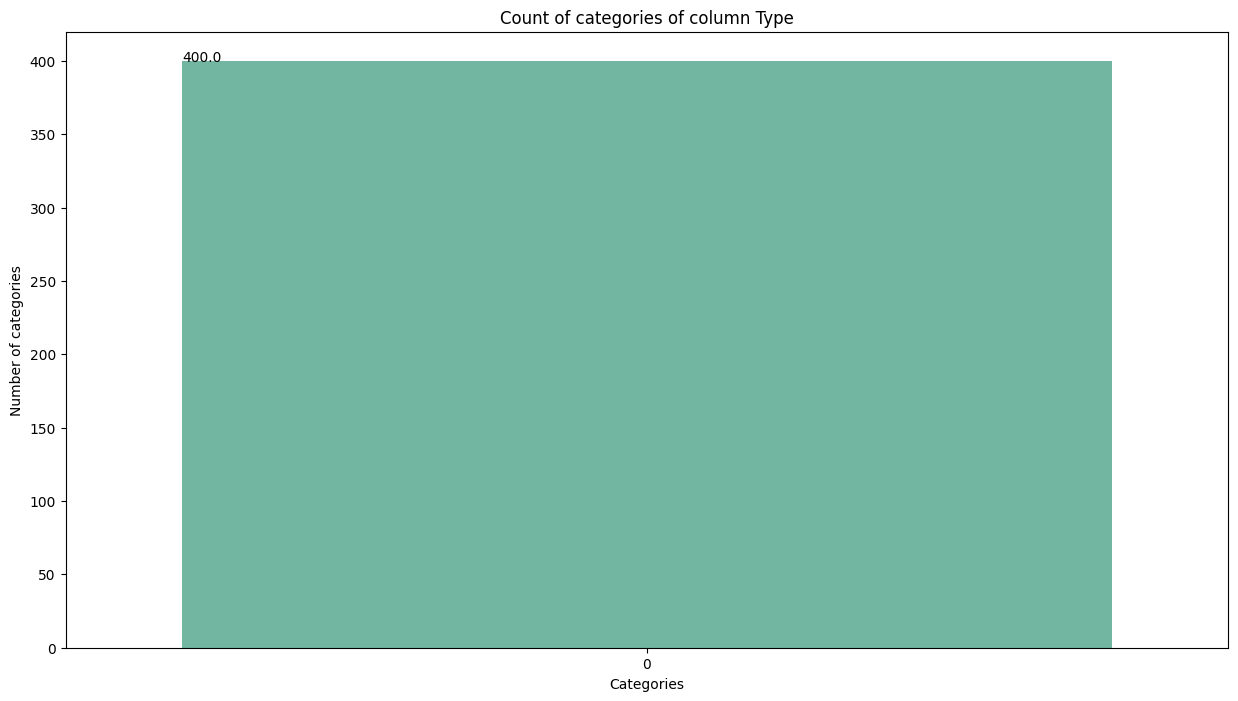

In [35]:
cat_count_plot(df,'Type')

In [36]:
# labels in majority
major_class5 = df[df['Type']==5]

# labels in minority
minor_class0 = df[df['Type']==0]
minor_class1 = df[df['Type']==1]
minor_class2 = df[df['Type']==2]
minor_class3 = df[df['Type']==3]
minor_class4 = df[df['Type']==4]
minor_class6 = df[df['Type']==6]

# Upsample the data
upsampled_minor_class0 =resample(minor_class0, n_samples=247)
upsampled_minor_class1 =resample(minor_class1, n_samples=247)
upsampled_minor_class2 =resample(minor_class2, n_samples=247)
upsampled_minor_class3 =resample(minor_class3, n_samples=247)
upsampled_minor_class4 =resample(minor_class4, n_samples=247)
upsampled_minor_class6 =resample(minor_class6, n_samples=247)

# Concatinate the upsampled with the major class
df_balanced = pd.concat([major_class5,
                         upsampled_minor_class0,
                         upsampled_minor_class1,
                         upsampled_minor_class2,
                         upsampled_minor_class3,
                         upsampled_minor_class4,
                         upsampled_minor_class6])

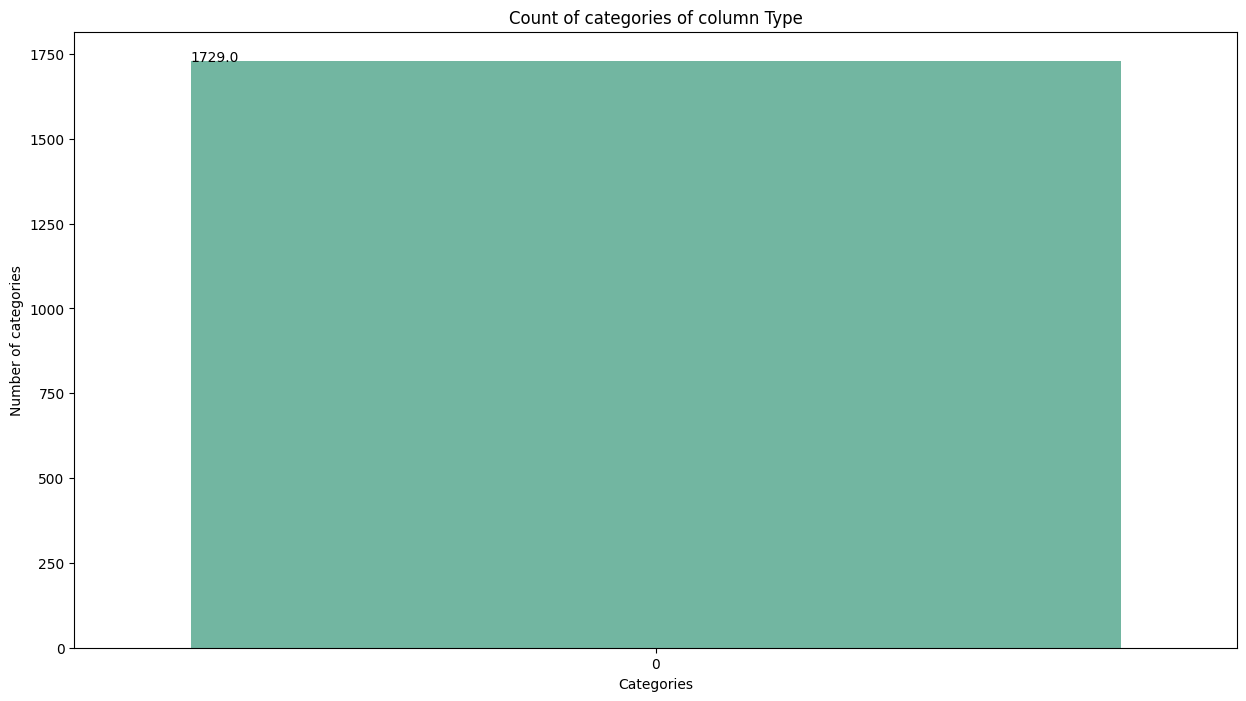

In [37]:
cat_count_plot(df_balanced,'Type')

## __Train-Test Split__

In [38]:
# Split data into features and target
X = df_balanced.drop(columns=['Type'])
Y = df_balanced['Type']
